# <center>Sales Analysis of Steel Products</center>
### <center>Project Proposal<center>

## 1 Introduction

My attempt to implement a ready-made solution in my business that would provide superior quality in business management, process optimization, and a comprehensive and detailed data overview proved to be frustrating and unsuccessful. As a result, I decided to develop my own solution using Excel as the platform. I created over seventy interconnected spreadsheets that generate dynamic charts and graphs, highlighting the crucial performance factors that I deemed necessary to measure and monitor. My office primarily operates in the field of carbon flat steel sales, distributing materials within a significant consumption region in southern Brazil.

This experience motivated me to continue my studies and pursue a BSc in Computer Science in 2019, with the goal of expanding my knowledge and expertise. At that time, while data science had already emerged as a global reality, its practical application in our daily market was relatively underexplored. Recognizing this gap, I saw an opportunity to bridge it.

Therefore, this analysis aims to explore the sales performance of my office by applying the techniques I have learned in this course. It will consider various factors, such as the quantity of materials sold, product families, sales trends over time, and price variations. By gaining a clear understanding of these factors and applying the learned techniques, I aim to advance both in business and knowledge, exploring the realms of data science, machine learning, and artificial intelligence. My goal is to expand my expertise and effectively utilize these techniques within a business context.

The data used in this analysis is sourced from my internal invoice system and has been exported to a CSV file.  To maintain data confidentiality, client names have been excluded from the analysis.


## 2 Objectives

The objective of this project is to conduct a comprehensive analysis of the sales patterns within my commercial representation office using a comprehensive dataset consisting of 16 columns at the end.

Through the examination of variables such as order values, quantities sold, pricing trends, and product families, we aim to assess the sales performance of the office. Additionally, we will explore correlations between different variables and analyze the impact of currency exchange rates on sales.

Furthermore, this project offers an opportunity to gain experience in utilizing data analysis tools and techniques, fostering skill development in extracting meaningful insights from complex datasets.

By the end of this project, we anticipate enhancing sales strategies, improving office performance, and expanding our proficiency in data analysis methodologies.


## 3 Data Overview

In this study, two CSV datasets will be used and merged together. One dataset, named **"raw_data.csv,"** contains information about product sales and will be represented by the **sales_data** data frame. The other dataset, named **"products.csv,"** will be represented by the **products** data frame and contains information about product categories. Since the original data is in the Portuguese language, the column names will be translated to facilitate analysis.

Additionally, historical data on the daily exchange rate of the Brazilian Real to the US Dollar was obtained through web scraping **(dollar_df)** from the Ipeadata website. According to the website's terms of use (http://www.ipeadata.gov.br/Default.aspx), the information is publicly accessible and can be freely copied and distributed. The website is intended to facilitate access to Brazilian statistics and promote the dissemination of Ipea's studies and research. As such, the content on the website is considered public information and must be appropriately cited by the user.

Here is an overview about **sales_data** after some unwanted columns have been dropped:

- The dataset consists of 8 columns, each providing specific information about the data.

- Out of the 8 columns, 4 columns have float data type (numerical values with decimal points), and 4 columns have object data type (typically representing text or mixed data types).

- The dataset contains a total of 2305 entries, indicating that there are 2305 rows in the dataset.

- The columns in the dataset include information such as dates of transactions, descriptions of the products, order details, quantities in kilograms, pricing in Brazilian Real currency, thickness and width of the material.

The dataset contains a combination of float64 and object (string) data types. It is important to note that some columns have non-null values for all entries (2304), while others have one additional non-null value (2305).


Here is an overview about **products** after some unwanted columns have been dropped:

- It consists of 4 columns: "Description," "Type of Product," "Commission," and "Product Family."

- Description: This column likely contains textual information describing the items.

- Type of Product: this column represents the categorization or classification of the products. It provides information about the specific type or category to which each item belongs.

- Commission: This column indicates the commission associated with each transaction or item.

- Product Family: This column represents the grouping or classification of the products into families. It provides information about the broader category or family to which each item belongs.

All the columns are of object data type, indicating that they likely contain text or mixed data types.
The "Description" column contains non-null values for all 2613 entries and likely provides textual information describing the items or transactions.
The "Type of Product" column also contains non-null values for all 2613 entries and likely represents the categorization or classification of the products.
The "Commission" column has 2605 non-null values, suggesting that some entries in this column might be missing or null.
The "Product Family" column contains non-null values for all 2613 entries and likely represents the grouping or classification of the products into families.

In [1]:
# Import libraries and modules
import pandas as pd
import requests 

#https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None # default='warn'

from bs4 import BeautifulSoup as bs
from pandas import Series, DataFrame
from datetime import datetime, timedelta
import matplotlib.pylab as plt
import seaborn as sns
import decimal
from decimal import Decimal
import re
plt.style.use('ggplot')


/home/mac/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import information about sales invoices
sales_data = pd.read_csv('./data/raw_data.csv')

In [3]:
# A glimpse of the first few lines of data:
sales_data.head()

Data Emissão- NF  Nota Fiscal         Cond Pagto  \
0         1/4/2021       354471    30 / 45 / 60 DD   
1         1/4/2021        10455    28 / 42 / 56 DD   
2         1/4/2021        10541  APRESENTACAO - 07   
3         1/5/2021       344861              45 DD   
4         1/5/2021       344905              45 DD   

                               Descrição  Pedido  Seq Ped  Qt Faturada   \
0      TR REL 0,30 BOB NBR5007 G4RL BbOL   37173       30           493   
1            TIRA FF BOB 1,90 NBR6658 OL   52676       10           836   
2  CHAPA ZC 1,25 NBR7008 ZC CR NORM RV B   52562       20           472   
3             CHAPA GR LTQ  6,30 NBR8300   29019       10         9,514   
4             CHAPA GR LTQ  6,30 NBR8300   29019       10        11,512   

   Vl Unit  Vl Peca   Vl Tot Item   Espessura    Largura  Compr   
0     5.80      -         3,002.37       0.30     41.00        0  
1     3.25      -         2,852.85       1.90     32.80        0  
2     3.27      -         1,651.38       1.25  1,200.00     3,06  
3     2.30      -        22,976.31       6.30  1,150.00        3  
4     2.30      -        27,801.48       6.30  1,150.00        3

In [4]:
# Now a glimpse of the last few lines of the table:
sales_data.tail()

Data Emissão- NF  Nota Fiscal         Cond Pagto  \
2299       12/30/2022       336991    30 / 45 / 60 DD   
2300       12/30/2022       339814   A VISTA - VENDOR   
2301       12/30/2022         2071  28/ 42/ 56/ 70/ 8   
2302       12/30/2022        10204  28 / 35 / 42 / 49   
2303       12/30/2022        11866  30 / 40 / 50 / 60   

                            Descrição  Pedido  Seq Ped  Qt Faturada   Vl Unit  \
2299      TIRA FF BOB 1,90 NBR6658 OL   20421       30           518     2.88   
2300       CHAPA GR LTQ  6,30 NBR8300   24691       10          5,95     2.11   
2301     CHAPA GR LCG  16,00 NBR 8300   51254       10         1,157     3.10   
2302      TIRA FF BOB 0,70 NBR6658 OL   52427       50           672     3.25   
2303  TIRA FQ DEC BOB 2,65 NBR6658 OL   54818       10           812     2.98   

      Vl Peca   Vl Tot Item   Espessura    Largura  Compr   
2299      -         1,566.43       1.90     50.00        0  
2300      -        12,554.50       6.30  1,200.00        3  
2301      -         3,766.04      16.00  1,500.00        3  
2302      -         2,293.20       0.70     68.00        0  
2303      -         2,540.75       2.65     78.00        0

As we can see, the imported data covers the years 2021 and 2022. As mentioned before, the data structure is in Portuguese, so we will convert the column names to English to facilitate the interpretation of this study. The columns *'Nota Fiscal','Cond Pagto',' Vl Peca ',' Vl Tot Item ' ,' Compr '* will be eliminated since they do not provide any utility or benefits for this study.

In [5]:
# Import information about products 
products = pd.read_csv('./data/products.csv')

In [6]:
# How the data is structured?
products.head()

Descricao Tipo de Produto Comissão              Item  \
0  BLANK CL FF OL 0,75 NBR 6658            BKFF       2%  GLFN036000753001   
1  BLANK CL FF OL 0,90 NBR 6658            BKFF       2%  GLFN036000903001   
2  BLANK CL FF OL 1,20 NBR 6658            BKFF       2%  GLFN036001203001   
3  BLANK CL FF OL 1,50 NBR 6658            BKFF       2%  GLFN036001503001   
4  BLANK CL FF OL 1,90 NBR 6658            BKFF       2%  GLFN036001903001   

   Cod FAMÍLIA PRODUTO  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
0  1.0           BLANK         NaN         NaN         NaN         NaN   
1  2.0           BLANK         NaN         NaN         NaN         NaN   
2  3.0           BLANK         NaN         NaN         NaN         NaN   
3  4.0           BLANK         NaN         NaN         NaN         NaN   
4  5.0           BLANK         NaN         NaN         NaN         NaN   

   Unnamed: 10 Unnamed: 11  
0          NaN         NaN  
1          NaN         NaN  
2          NaN         NaN  
3          NaN         NaN  
4          NaN         NaN

As we can see, the **"Descrição"** columns in the **sales_data** and **products** datasets appear to contain the same types of information. We will use these columns to merge the two datasets in order to obtain more categorized information about the products. The columns "Cod" and "Unnamed" do not make sense to keep, so we will eliminate them later.

In [7]:
# A further look into the data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data Emissão- NF  2304 non-null   object 
 1   Nota Fiscal       2304 non-null   int64  
 2   Cond Pagto        2304 non-null   object 
 3   Descrição         2304 non-null   object 
 4   Pedido            2304 non-null   int64  
 5   Seq Ped           2304 non-null   int64  
 6    Qt Faturada      2304 non-null   object 
 7   Vl Unit           2304 non-null   float64
 8    Vl Peca          2304 non-null   object 
 9    Vl Tot Item      2304 non-null   object 
 10  Espessura         2304 non-null   float64
 11  Largura           2304 non-null   object 
 12   Compr            2304 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 234.1+ KB


Some changes regarding the data types will need to be made in order to perform proper data manipulation. For example, the field *"Data Emissão- NF"* which means *"Date"* needs to be converted to Datetime format. At first glance, we also observe that the quantity of non-null values is practically nonexistent in all fields of the dataset.

In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Descricao        2613 non-null   object 
 1   Tipo de Produto  2613 non-null   object 
 2   Comissão         2605 non-null   object 
 3   Item             2469 non-null   object 
 4   Cod              2556 non-null   float64
 5   FAMÍLIA PRODUTO  2613 non-null   object 
 6   Unnamed: 6       0 non-null      float64
 7   Unnamed: 7       0 non-null      float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      1 non-null      object 
dtypes: float64(6), object(6)
memory usage: 245.1+ KB


The field *"Comissão"* representing the commission paid per type of product needs to be converted to numeric format. Additionally, we can identify some issues with missing data in this field.

## 4 Web Scraping

In order to analyze the potential correlation between the price of the US Dollar and the variation in material prices, it is necessary to calculate the daily fluctuations of the Dollar's exchange rate in Brazilian Reais. This can be achieved by determining the difference between consecutive daily prices. By examining these variations, we can assess if any relationship exists between the Dollar's price and the fluctuation in material prices.

In [9]:
# Start Web Scraping
r = requests.get("http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=38590&module=M")

In [10]:
# Convert to a beautiful soup object
soup = bs(r.content)
soup.prettify()

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <script data-dtconfig="rid=RID_514660424|rpid=-66062147|domain=ipeadata.gov.br|reportUrl=/rb_8d61458e-426f-4d44-a138-2d66bd9a76ef|app=ea7c4b59f27d43eb|srms=1,1,,,|uxrgcm=100,25,300,3;100,25,300,3|featureHash=ICA2SVfqru|dpvc=1|lastModification=1579894847177|dtVersion=10183200114120852|tp=500,50,0,1|rdnt=1|uxrgce=1|uxdcw=1500|bp=2|agentUri=/ruxitagentjs_ICA2SVfqru_10183200114120852.js" src="/ruxitagentjs_ICA2SVfqru_10183200114120852.js" type="text/javascript">\n  </script>\n  <link href="/DXR.axd?r=1_14,1_16,10_0,1_11,1_10,1_1,1_7,1_8,1_6-JQ0Ub" rel="stylesheet" type="text/css"/>\n  <title>\n   Ipeadata\n  </title>\n  <link href="css/estilos.css" rel="stylesheet" type="text/css"/>\n </head>\n <body>\n  <form action="./ExibeSerie.aspx?serid=38590&amp;module=M" id="frm" method="post" name="frm">\n   <input id="__

Even when using **'soup.prettify()'** that adds indentation and line breaks, it is still difficult to visualize the page structure. However, the data we are seeking is structured in the form of a table, as shown below.



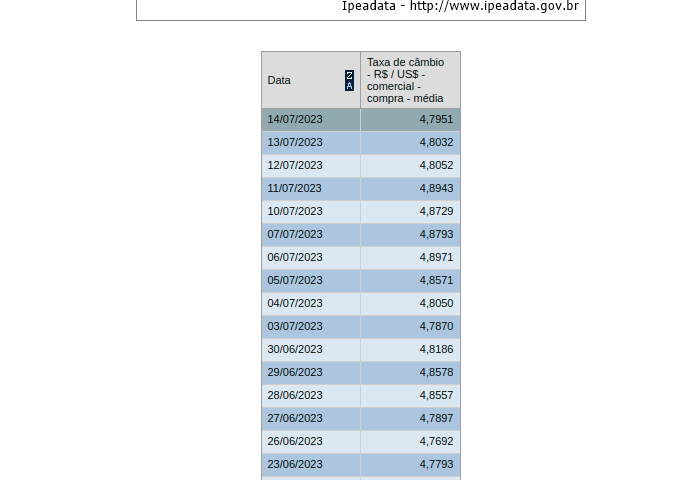

 Upon inspecting the table, it is evident that the data we are seeking, **date and value**, is inserted within **`<tr></tr>`** tags with an ID that follows the following pattern *id="grd_DXDataRow0"*, where "Rows0" at the end indicates the most recent data.
 
 Therefore, we can create a function that searches for this ID pattern within **`<tr></tr>`** tags inside the soup object and then collects the data within **`<td></td>`** each tag.

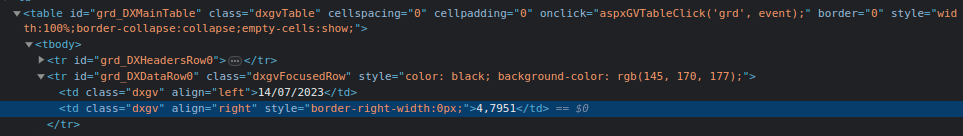

To define the range of data to be extracted from the web, we can assume that the "Data Emissão- NF" field, which represents the date, is in chronological order. We can start by identifying the date of the first occurrence. Then, we calculate the difference in the number of days between the last occurrence and today's date. This calculated difference will serve as the range for web scraping, ensuring that only the data within that specific period is collected.

In [11]:
first_date  = pd.to_datetime(sales_data ['Data Emissão- NF'].iloc[0]).date()
today = datetime.today().date()
range_date = (today - first_date).days
print(f' Today is: {today}')
print(f' The first date in the dataset is: {first_date}')
print(f' The range_date is: {range_date}')

 Today is: 2023-07-16
 The first date in the dataset is: 2021-01-04
 The range_date is: 923


Now we can define a function that retrieves the dollar values within the specified time period and returns a DataFrame with the dollar values and dates in datetime format. To perform this search, the function assumes a fixed ID pattern and increments the final part of the ID, which represents each row of the table, in each iteration of the loop.

In [12]:
def get_dollar_value():
    date = []
    value = []
    for id in range((range_date)):
        id = str(id)
        pattern = 'grd_DXDataRow' + id
        id = int(id)
        
        # It searches for the first <tr> element that has an id attribute matching the pattern 
        tr =  soup.find('tr', {'id' : pattern})
        # retrieves all the <td> (table cell) elements within a specific <tr> (table row) element.
        t_data_tags = tr.find_all("td")
        date.append(t_data_tags[0].text)
        value.append(t_data_tags[1].text)
        date[id] = datetime.strptime(date[id], '%d/%m/%Y')
        if (date[id]) == first_date:
            break
    data = {'Date': date, 'US_Dollar_in_R$': value}
    dollar_df = pd.DataFrame(data)
 
    return dollar_df

In [13]:
# Get dollar values 
dollar_df = get_dollar_value()

In [14]:
dollar_df.head()

Date US_Dollar_in_R$
0 2023-07-14          4,7951
1 2023-07-13          4,8032
2 2023-07-12          4,8052
3 2023-07-11          4,8943
4 2023-07-10          4,8729

In [15]:
dollar_df.tail()

Date US_Dollar_in_R$
918 2019-11-04          3,9916
919 2019-11-01          3,9780
920 2019-10-31          4,0035
921 2019-10-30          4,0180
922 2019-10-29          3,9940

In [16]:
dollar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             923 non-null    datetime64[ns]
 1   US_Dollar_in_R$  923 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 14.5+ KB


Now we have a nice and formatted DataFrame with enough data from the specified period that can be merged with the other datasets.

## 5 Data Cleaning and preparation

In this particular phase, my main objective is to eliminate unnecessary columns from the DataFrame. Additionally, I will prepare the remaining columns by assigning appropriate data types to ensure accurate calculations and meaningful analyses. This includes removing any NaN (missing) values and checking for duplicates in the data.

By removing unnecessary columns, we can streamline the DataFrame and focus only on the relevant information. This helps to reduce clutter and improve the efficiency of subsequent analyses.

Assigning appropriate data types to the columns is important for ensuring accurate calculations and meaningful interpretations. For example, numerical columns should be assigned the correct numeric data types (e.g., int or float), date columns should be assigned the datetime data type, and categorical columns should be assigned the category data type.

Removing NaN values is crucial to ensure that the data is clean and complete. NaN values can disrupt calculations and analysis, so it's important to handle them appropriately, either by imputing missing values or excluding rows with missing data, depending on the specific context and requirements.

Checking for duplicates helps identify any redundant or repeated entries in the data. By identifying and removing duplicates, you can ensure that each data point is unique and avoid skewing the results of your analyses.

By executing these steps in this phase, you will have a refined DataFrame that is optimized for accurate calculations, meaningful analyses, and reliable insights.

In [17]:
# Drop undesired columns from both datasets
sales_data.drop(['Nota Fiscal','Cond Pagto',' Vl Peca ',' Vl Tot Item ' ,' Compr '], axis=1, inplace=True)
products.drop(['Item','Cod','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'], axis=1, inplace=True)

In [18]:
# Translate the Columns to English
sales_data = sales_data.rename(columns={'Data Emissão- NF': 'Date',
                    'Descrição':'Description',
                    'Pedido': 'Order',
                    'Seq Ped': 'Order_Seq',
                    ' Qt Faturada ':'Quantity_KG',
                    'Vl Unit':'Price_KG_R$',
                    'Espessura':'Thickness',
                   'Largura':'Width'                   
                  })

products = products.rename(columns={'Descricao': 'Description',
                    'Tipo de Produto': 'Type of Product',
                    'Comissão': 'Commission',
                    'Item':'Item',
                    'Cod':'Cod',
                    'FAMÍLIA PRODUTO':'Product Family'                       
                  })

In [19]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2304 non-null   object 
 1   Description  2304 non-null   object 
 2   Order        2304 non-null   int64  
 3   Order_Seq    2304 non-null   int64  
 4   Quantity_KG  2304 non-null   object 
 5   Price_KG_R$  2304 non-null   float64
 6   Thickness    2304 non-null   float64
 7   Width        2304 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 144.1+ KB


In [20]:
# Convert Date as datetime format 
sales_data ['Date'] = pd.to_datetime(sales_data['Date'])
print(sales_data['Date'].isnull().sum())

0


In [21]:
# Merge sales_data and products into a single dataframe.
final_df = pd.merge(sales_data, products)

In [22]:
# Merge final_df and dollar_df into a single dataframe.
final_df = pd.merge(final_df, dollar_df)

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2284 entries, 0 to 2283
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2284 non-null   datetime64[ns]
 1   Description      2284 non-null   object        
 2   Order            2284 non-null   int64         
 3   Order_Seq        2284 non-null   int64         
 4   Quantity_KG      2284 non-null   object        
 5   Price_KG_R$      2284 non-null   float64       
 6   Thickness        2284 non-null   float64       
 7   Width            2284 non-null   object        
 8   Type of Product  2284 non-null   object        
 9   Commission       2284 non-null   object        
 10  Product Family   2284 non-null   object        
 11  US_Dollar_in_R$  2284 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 232.0+ KB


As we can see, the **final_df** DataFrame has lost some data compared to the initial **sales_df** DataFrame. Previously, we had 2304 rows, and now we have 2284 rows in all fields, suggesting that there may not be any missing values now. This reduction in the number of rows could be attributed to the presence of missing values in the **products** table. It is essential to address this issue in the future to ensure data completeness in our system's database.

In [24]:
# Convert string to numeric (float) but need to remove the comma first.
# https://stackoverflow.com/questions/39125665/cannot-convert-string-to-float-in-pandas-valueerror
final_df['US_Dollar_in_R$'] = final_df['US_Dollar_in_R$'].apply(lambda x: str(x.split()[0].replace(',', '.')))
final_df['US_Dollar_in_R$'] = final_df['US_Dollar_in_R$'].astype(float)

In [25]:
# Convert Quantity_Kg to numeric
final_df['Quantity_KG'] = final_df['Quantity_KG'].apply(lambda x: str(x.split()[0].replace(',', '.')))
final_df['Quantity_KG'] = final_df['Quantity_KG'].astype(float)

In [26]:
# Checking for NaN Values
final_df.isna().sum()

Date               0
Description        0
Order              0
Order_Seq          0
Quantity_KG        0
Price_KG_R$        0
Thickness          0
Width              0
Type of Product    0
Commission         0
Product Family     0
US_Dollar_in_R$    0
dtype: int64

In [27]:
final_df.loc[0:0]

Date                        Description  Order  Order_Seq  \
0 2021-01-04  TR REL 0,30 BOB NBR5007 G4RL BbOL  37173         30   

   Quantity_KG  Price_KG_R$  Thickness   Width Type of Product Commission  \
0        493.0          5.8        0.3  41.00         TIRA REL         2%   

  Product Family  US_Dollar_in_R$  
0     RELAMINADO            5.162

The objective at hand is to convert the columns **'Order'** and **'Order_Seq'** into strings. This conversion will enable us to easily concatenate the values from both columns, resulting in a combined column. By creating this combined column, we can simplify the task of identifying duplicate values. This new column will act as a single identifier, streamlining the process of identifying and managing any duplicate entries within the dataset.
After that we can delete **'Order'** column.

In [28]:
# Make it as string to concatenate with Order_Seq
final_df['Order'] = final_df['Order'].apply(lambda x: str(x))

# Make it as string to concatenate with Order
final_df['Order_Seq'] = final_df['Order_Seq'].apply(lambda x: str(x))

# Concatenate Order and Order_seq 
final_df['Order_Seq'] = final_df['Order'] + '-' + final_df['Order_Seq']

In [29]:
final_df.loc[0:0]

Date                        Description  Order Order_Seq  Quantity_KG  \
0 2021-01-04  TR REL 0,30 BOB NBR5007 G4RL BbOL  37173  37173-30        493.0   

   Price_KG_R$  Thickness   Width Type of Product Commission Product Family  \
0          5.8        0.3  41.00         TIRA REL         2%     RELAMINADO   

   US_Dollar_in_R$  
0            5.162

In [30]:
del final_df['Order']

In [31]:
# Now we can check for duplicates
duplicates = final_df.duplicated(subset=['Order_Seq',"Quantity_KG"], keep = False)

# Filter the original DataFrame to show only the duplicate rows
duplicate_rows = final_df[duplicates]

print(f'The number of duplicates is: {duplicates.sum()}')
#duplicates.head()
duplicate_rows.head()

The number of duplicates is: 42


Date                    Description Order_Seq  Quantity_KG  \
468 2021-08-11  CHAPA GR LCG  25,00 ASTM A 36  43719-10        2.623   
469 2021-08-11  CHAPA GR LCG  25,00 ASTM A 36  43719-10        2.623   
520 2021-10-06  CHAPA GR LCG  25,00 ASTM A 36  26381-20        2.515   
521 2021-10-06  CHAPA GR LCG  25,00 ASTM A 36  26381-20        2.515   
610 2022-04-07  CHAPA GR LCG  25,00 ASTM A 36  64142-10        2.582   

     Price_KG_R$  Thickness      Width Type of Product Commission  \
468         3.80       25.0  2,000.00        CG DO LCG         1%   
469         3.80       25.0  2,000.00        CG DO LCG         1%   
520         3.13       25.0  2,000.00        CG DO LCG         1%   
521         3.13       25.0  2,000.00        CG DO LCG         1%   
610         2.74       25.0  2,000.00        CG DO LCG         1%   

    Product Family  US_Dollar_in_R$  
468          CHAPA           5.2007  
469          CHAPA           5.2007  
520          CHAPA           5.5091  
521          CHAPA           5.5091  
610          CHAPA           4.7416

In [32]:
# Drop the duplicates
final_df = final_df.drop_duplicates()
duplicates = final_df.loc[final_df.duplicated(subset=['Order_Seq','Quantity_KG'])]
print(f'The number of duplicates is: {final_df.duplicated(subset=["Order_Seq", "Quantity_KG"]).sum()}')
duplicates

The number of duplicates is: 0


Empty DataFrame
Columns: [Date, Description, Order_Seq, Quantity_KG, Price_KG_R$, Thickness, Width, Type of Product, Commission, Product Family, US_Dollar_in_R$]
Index: []

We have effectively removed all duplicate entries from the dataset! <br>


Now we will create separate columns for **day, month, and year** from the **'Date'** column. This step will be beneficial for grouping the data based on each of these columns and extracting valuable insights from the dataset.

Additionally, we will create the columns **'Total'** and **'Price_KG_USD'**. These columns will provide additional valuable information for analysis and comparison purposes. The **'Total'** column will represent the total value of sales, while the **'Price_KG_USD'** column will indicate the price per kilogram in US Dollars.


These operations performed on the DataFrame will have the following implications:

- The creation of the **'Day'**, **'Month'**, and **'Year'** columns allows for better organization and analysis of the data based on these temporal components. This enables grouping and extracting insights at a granular level, such as sales trends by day, month, or year.

- The calculation of the total sold without taxes in the **'Total'** column provides an important metric for evaluating the overall sales performance. By multiplying the price per kilogram **('Price_KG_R$')** by the quantity in kilograms **('Quantity_KG')**, we obtain the total value of the sales, excluding any associated taxes or fees.

- The creation of the **'Price_KG_USD'** column offers an additional perspective on pricing by converting the price per kilogram from Brazilian Real (R$/Kg) to US Dollars (USD/Kg). This conversion facilitates comparisons with international markets and enables analysis of price differentials and competitiveness.

- Finally, the *reordering* of the columns in the DataFrame helps to improve readability and ensures that the columns are organized according to the desired order specified in the code. This can be useful for easier data interpretation and downstream analysis.

In [33]:
# Create a day column and Get the day from Date
final_df['Day'] = final_df['Date'].dt.day

# Create a Month column and Get the month from Date
final_df['Month'] = (final_df['Date'].dt.month)

# Create a Year column and get the year from Date
final_df['Year'] = final_df['Date'].dt.year

# Create a Column for USD/kg price by converting the R$/Kg Price as USD/Kg Price 
final_df['Price_KG_USD'] = final_df['Price_KG_R$'] / final_df['US_Dollar_in_R$']

# Get the total sold without taxes
final_df['Total_U$'] = final_df['Price_KG_USD'] * final_df['Quantity_KG']

# Reorder the columns
final_df= pd.DataFrame(final_df, columns=["Date",'Day','Month','Year','Order_Seq',"Description",
                               'Thickness','Width','Type of Product','Product Family',
                               'Quantity_KG','Price_KG_R$','US_Dollar_in_R$','Price_KG_USD','Total_U$','Commission'
                              ])

final_df.loc[0:1]

Date  Day  Month  Year Order_Seq                        Description  \
0 2021-01-04    4      1  2021  37173-30  TR REL 0,30 BOB NBR5007 G4RL BbOL   
1 2021-01-04    4      1  2021  52676-10        TIRA FF BOB 1,90 NBR6658 OL   

   Thickness   Width Type of Product Product Family  Quantity_KG  Price_KG_R$  \
0        0.3  41.00         TIRA REL     RELAMINADO        493.0         5.80   
1        1.9  32.80       TFF OL BOB           FITA        836.0         3.25   

   US_Dollar_in_R$  Price_KG_USD    Total_U$ Commission  
0            5.162      1.123596  553.932584         2%  
1            5.162      0.629601  526.346377         2%

The idea now is to extract certain values into variables so that they can be used for calculating metrics and visualizing the distribution of the values later on.

In summary, we intent to do the following :

1. Extract the unique values from the **'Day'** column and store them in the **'days'** variable. This list will represent the chronological order of days and can be used for analyzing the sales amount on each day.


2. Extract the unique values from the **'Month'** column and store them in the **'months'** variable. This list will represent the chronological order of months and can be used for analyzing the sales amount on a monthly basis.


3. Extract the unique values from the **'Year'** column and stores them in the **'years'** variable. This list will represent the chronological order of years and can be used for analyzing the sales amount on an annual basis.


4. Retrieve the values from the **'Quantity_KG'**, **'Thickness'**, **'Width'**, and **'Prices'** columns. These lists of quantities, thicknesses, widths, and prices can be used for further analysis or calculations.


These operations allow for the extraction of unique values from specific columns, enabling analysis based on days, months, and years. Additionally, the values from other columns can be used for various purposes, such as calculating statistics or performing further analysis on the dataset.



In [34]:
# To obtain a list of days in chronological order, we can extract the unique values from the 'Day' column. 
days = (final_df['Day'].unique())
days.sort()
days

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [35]:
# To obtain a list of months in chronological order, we can extract the unique values from the 'Month' column. 
months = (final_df['Month'].unique())
months.sort()
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [36]:
# To obtain a list of years in chronological order, we can extract the unique values from the 'Year' column. 
years = (final_df['Year'].unique())
years.sort()
years

array([2021, 2022])

In [37]:
quantities = (final_df['Quantity_KG'])
quantities

0       493.000
1       836.000
2       472.000
3       623.000
4         9.514
         ...   
2279    462.000
2280    482.000
2281      1.507
2282     11.897
2283      5.446
Name: Quantity_KG, Length: 2263, dtype: float64

In [38]:
thicknesses = (final_df['Thickness'])
#thicknesses.sort()
thicknesses

0       0.30
1       1.90
2       1.25
3       0.30
4       6.30
        ... 
2279    0.60
2280    9.50
2281    1.20
2282    4.75
2283    0.95
Name: Thickness, Length: 2263, dtype: float64

In [39]:
widths = (final_df['Width'])
#widths.sort()
widths

0          41.00 
1          32.80 
2       1,200.00 
3          22.00 
4       1,150.00 
          ...    
2279       25.00 
2280    2,000.00 
2281      160.00 
2282    1,200.00 
2283    1,200.00 
Name: Width, Length: 2263, dtype: object

In [40]:
real_prices = (final_df['Price_KG_R$'])
real_prices

0       5.80
1       3.25
2       3.27
3       5.80
4       2.30
        ... 
2279    3.62
2280    2.70
2281    6.32
2282    2.90
2283    3.99
Name: Price_KG_R$, Length: 2263, dtype: float64

In [41]:
dollar_prices = (final_df['Price_KG_USD'])
dollar_prices

0       1.123596
1       0.629601
2       0.633475
3       1.088936
4       0.431819
          ...   
2279    0.699274
2280    0.512052
2281    1.253844
2282    0.578138
2283    0.776189
Name: Price_KG_USD, Length: 2263, dtype: float64

In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2263 entries, 0 to 2283
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2263 non-null   datetime64[ns]
 1   Day              2263 non-null   int64         
 2   Month            2263 non-null   int64         
 3   Year             2263 non-null   int64         
 4   Order_Seq        2263 non-null   object        
 5   Description      2263 non-null   object        
 6   Thickness        2263 non-null   float64       
 7   Width            2263 non-null   object        
 8   Type of Product  2263 non-null   object        
 9   Product Family   2263 non-null   object        
 10  Quantity_KG      2263 non-null   float64       
 11  Price_KG_R$      2263 non-null   float64       
 12  US_Dollar_in_R$  2263 non-null   float64       
 13  Price_KG_USD     2263 non-null   float64       
 14  Total_U$         2263 non-null   float64

# 6 Data Analysis

Start questioning and analyse the data.<br>
First, let's examine the statistical summary of the **'Price_KG_USD'** and **'US_Dollar_in_R$'** columns to gain insights into the behavior of the US dollar exchange rate in relation to the Brazilian real.

Text(0.5, 0, 'Price_KG_USD')

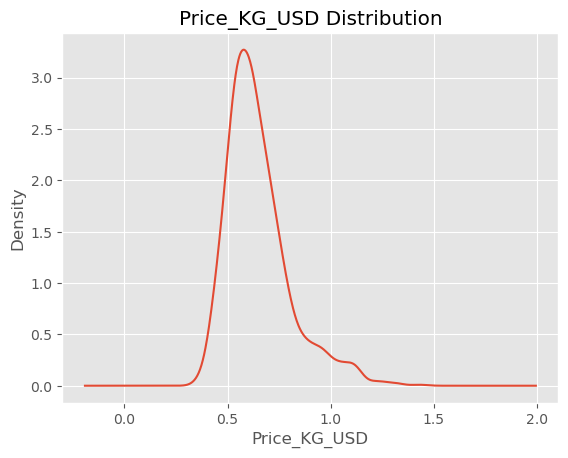

In [147]:
price_view = final_df['Price_KG_USD'].plot(kind = 'kde', title= 'Price_KG_USD Distribution')

price_view.set_xlabel('Price_KG_USD')

Text(0, 0.5, 'Count')

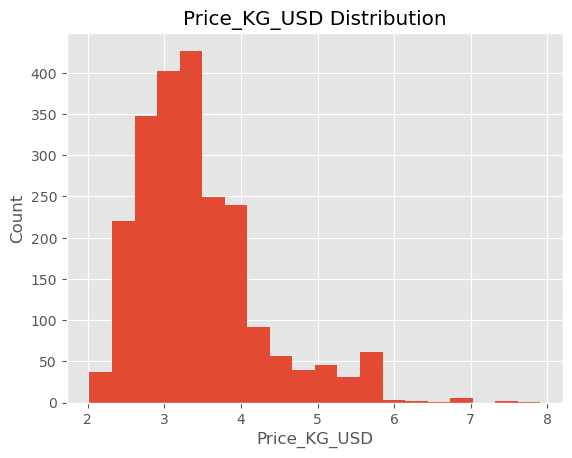

In [152]:
price_view = final_df['Price_KG_R$'].plot(kind = 'hist', bins = 20, title= 'Price_KG_USD Distribution')
price_view.set_xlabel('Price_KG_USD')
price_view.set_ylabel('Count')

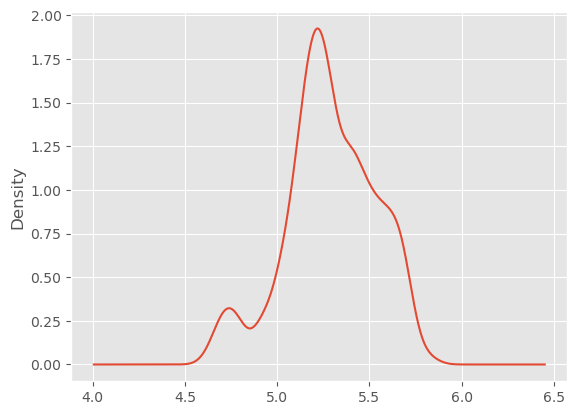

In [135]:
dollar_view = final_df['US_Dollar_in_R$'].plot(kind = 'kde')

Text(0, 0.5, 'Count')

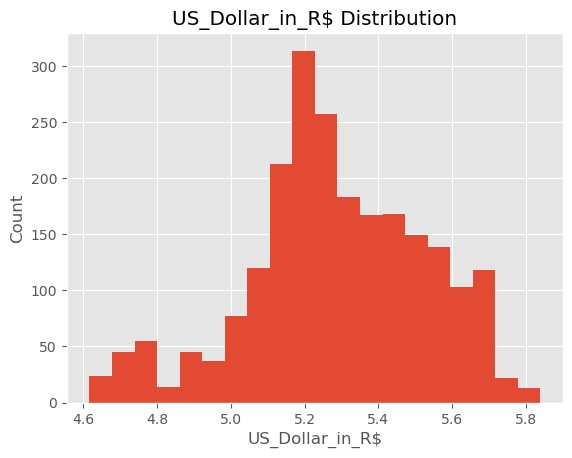

In [153]:
dollar_view = final_df['US_Dollar_in_R$'].plot(kind = 'hist', bins = 20, title= 'US_Dollar_in_R$ Distribution')

dollar_view.set_xlabel('US_Dollar_in_R$')
dollar_view.set_ylabel('Count')

In [157]:
stats = final_df.describe()[['Price_KG_USD', 'US_Dollar_in_R$']]
stats

Price_KG_USD  US_Dollar_in_R$
count   2263.000000      2263.000000
mean       0.648959         5.286130
std        0.156526         0.243601
min        0.355365         4.616900
25%        0.543736         5.145600
50%        0.616416         5.277700
75%        0.717505         5.460200
max        1.447896         5.839100

Let's explore the correlation between the price of materials in the Brazilian currency and the variation of the US dollar price during the same period in Brazil. Is there a direct correlation between these two variables?

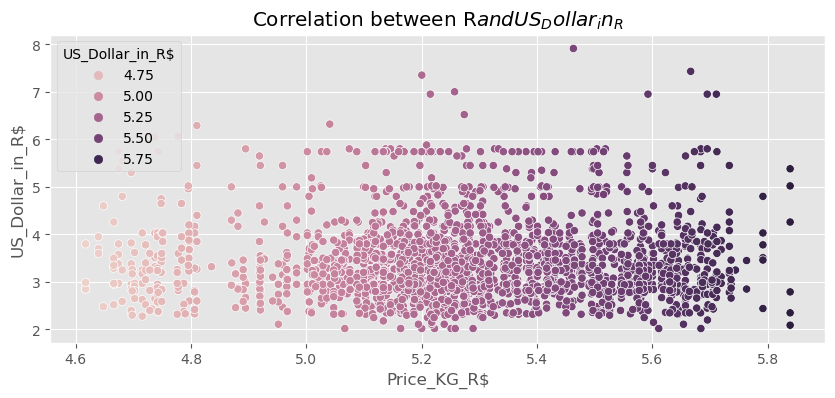

In [160]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=final_df, x='US_Dollar_in_R$', y='Price_KG_R$', hue='US_Dollar_in_R$')
plt.xlabel('Price_KG_R$')
plt.ylabel('US_Dollar_in_R$')
plt.title('Correlation between R$ and US_Dollar_in_R$')
plt.show()

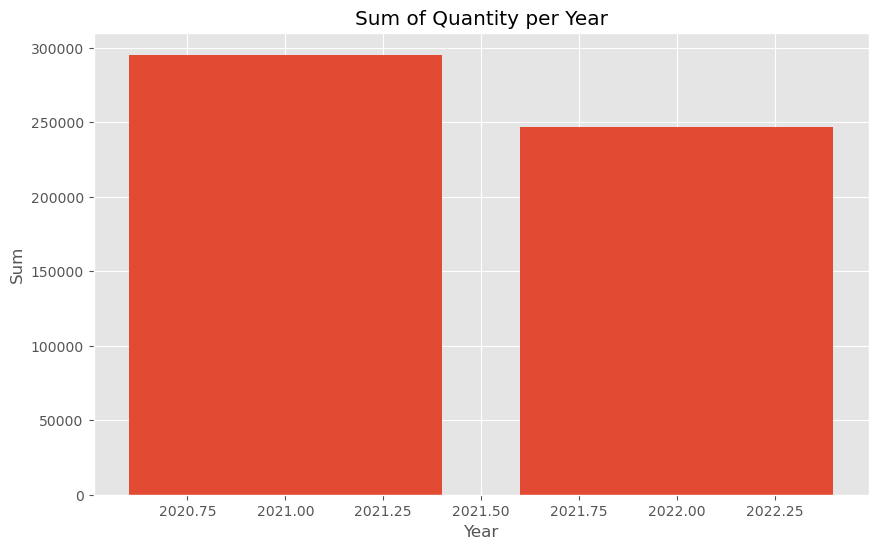

In [190]:
values = ['Quantity_KG']
sales_years = final_df.groupby('Year')[values].sum()
plt.figure(figsize=(10, 6))
plt.bar(years, sales_years['Quantity_KG'])
plt.xlabel('Year')
plt.ylabel('Sum')
plt.title('Sum of Quantity per Year')
plt.show()

What is the best month for sales?

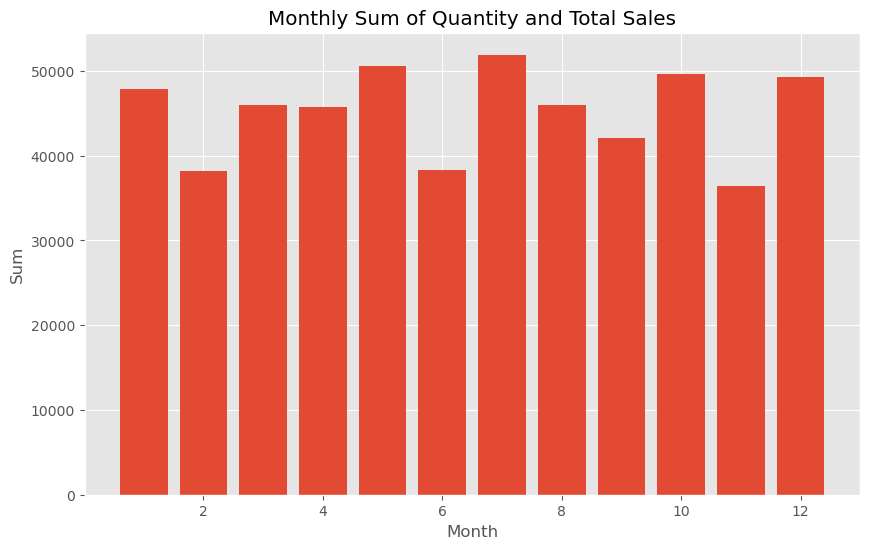

In [191]:
values = ['Quantity_KG']
sales_month = final_df.groupby('Month')[values].sum()
plt.figure(figsize=(10, 6))
plt.bar(months, sales_month['Quantity_KG'])
plt.xlabel('Month')
plt.ylabel('Sum')
plt.title('Monthly Sum of Quantity and Total Sales')
plt.show()

What are the days with the highest sales volume?

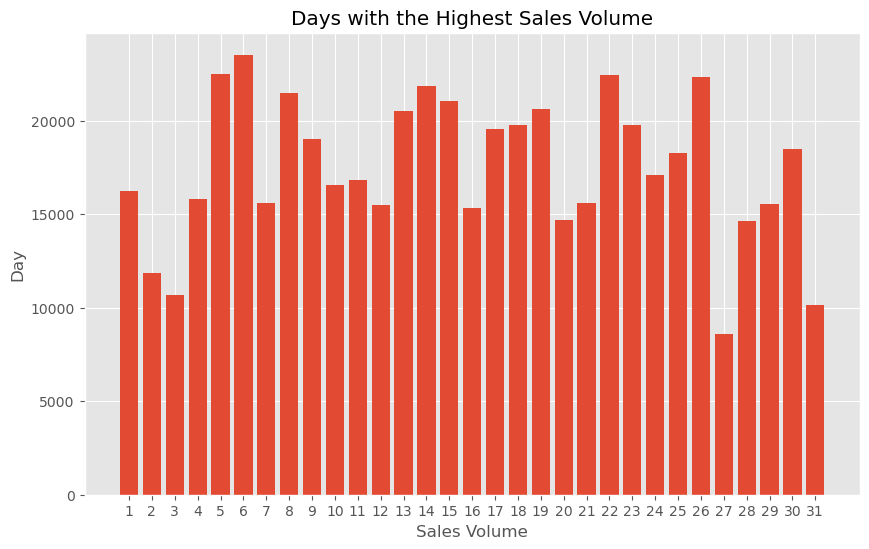

In [44]:
sales_day = final_df.groupby('Day')[['Quantity_KG']].sum().reset_index()
sales_day.sort_values(['Quantity_KG'], ascending=False)
# plot the sales by day
plt.figure(figsize=(10, 6))
plt.bar(days, sales_day['Quantity_KG'])
plt.xticks(days)
plt.ylabel('Day')
plt.title('Days with the Highest Sales Volume')
plt.xlabel('Sales Volume')
plt.show()

How is the sales volume distributed by material for each day?

<Figure size 1000x600 with 0 Axes>

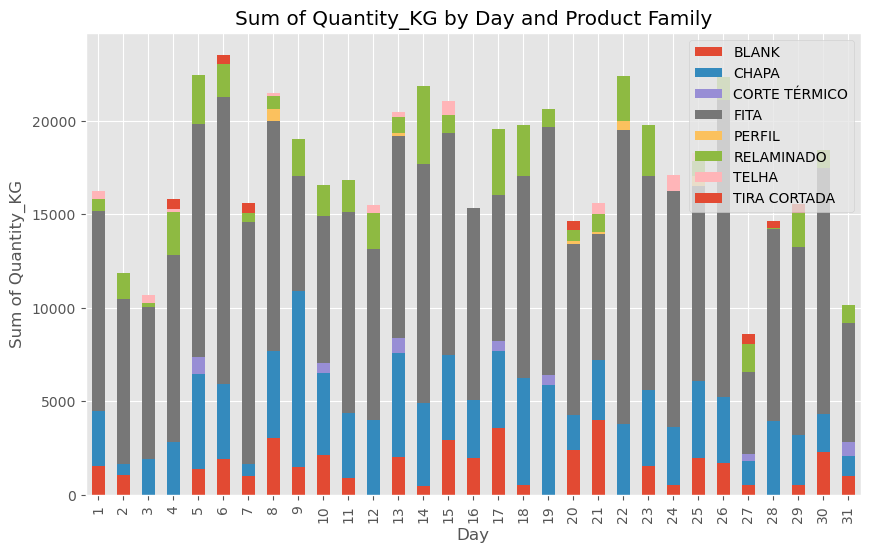

In [158]:
# Group and sum the data
grouped_data = final_df.groupby(['Day', 'Product Family'])[['Quantity_KG']].sum().reset_index()
# Create a pivot table for better visualization
pivot_data = grouped_data.pivot(index='Day', columns='Product Family', values='Quantity_KG')
# Plot the pivot table
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Day')
plt.ylabel('Sum of Quantity_KG')
plt.title('Sum of Quantity_KG by Day and Product Family')
plt.legend()
plt.show()

What is the best-selling product family over time?

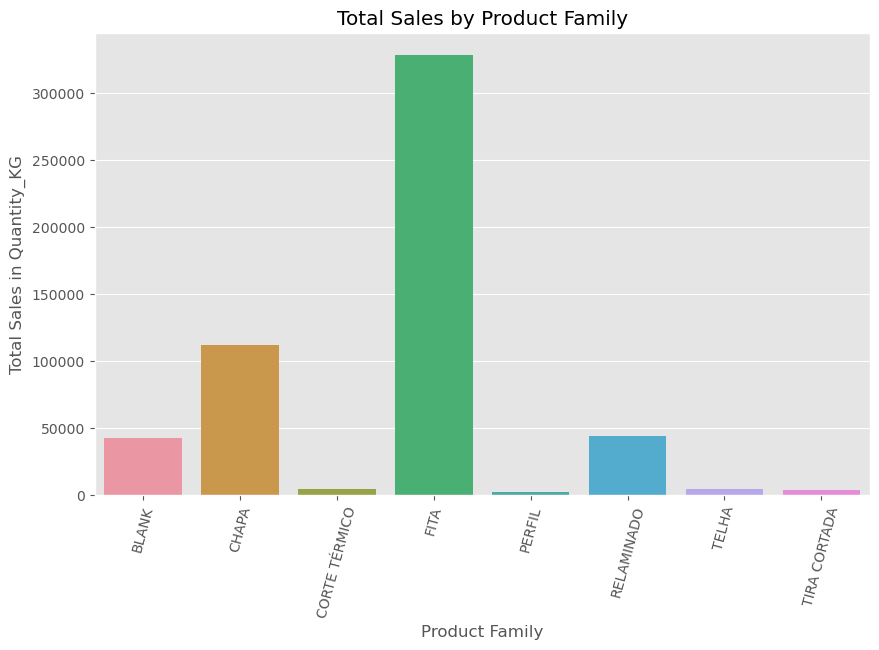

In [46]:
product_group = final_df.groupby(['Product Family'])
product_group_val = product_group['Quantity_KG'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Family', y='Quantity_KG', data=product_group_val)
plt.xlabel('Product Family')
plt.ylabel('Total Sales in Quantity_KG')
plt.title('Total Sales by Product Family')
plt.xticks(rotation=75)
plt.show()

Let's delve deeper into the top-selling product family, specifically **"FITA."** We will examine the different *types of products* within this family and their corresponding quantities.

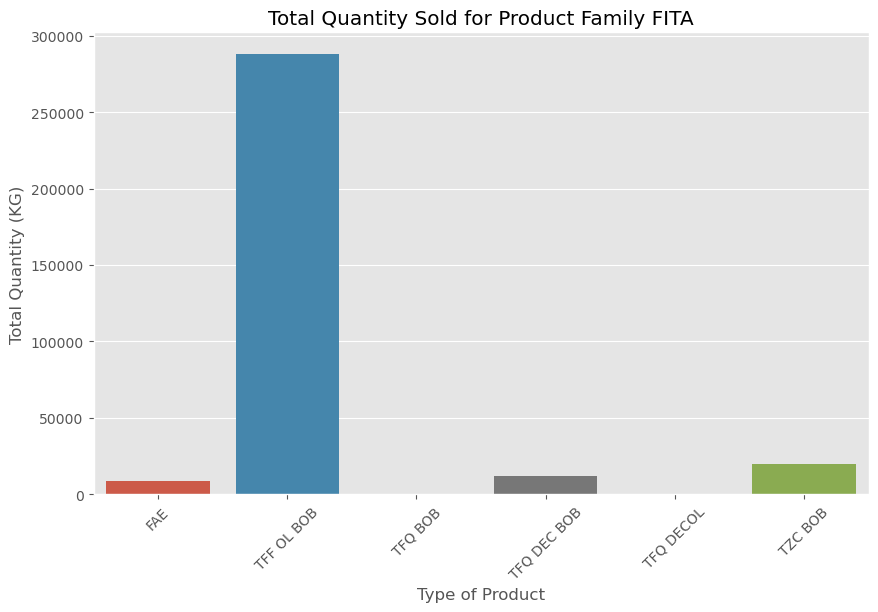

In [47]:
filtered_product = final_df[final_df['Product Family'] == 'FITA']
filtered_product_val = filtered_product.groupby('Type of Product')['Quantity_KG'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Type of Product', y='Quantity_KG', data=filtered_product_val)
plt.xlabel('Type of Product')
plt.ylabel('Total Quantity (KG)')
plt.title('Total Quantity Sold for Product Family FITA')
plt.xticks(rotation=45)
plt.show()

Let's visualize the distribution of products sold over time.<br>
How many times each product was sold?

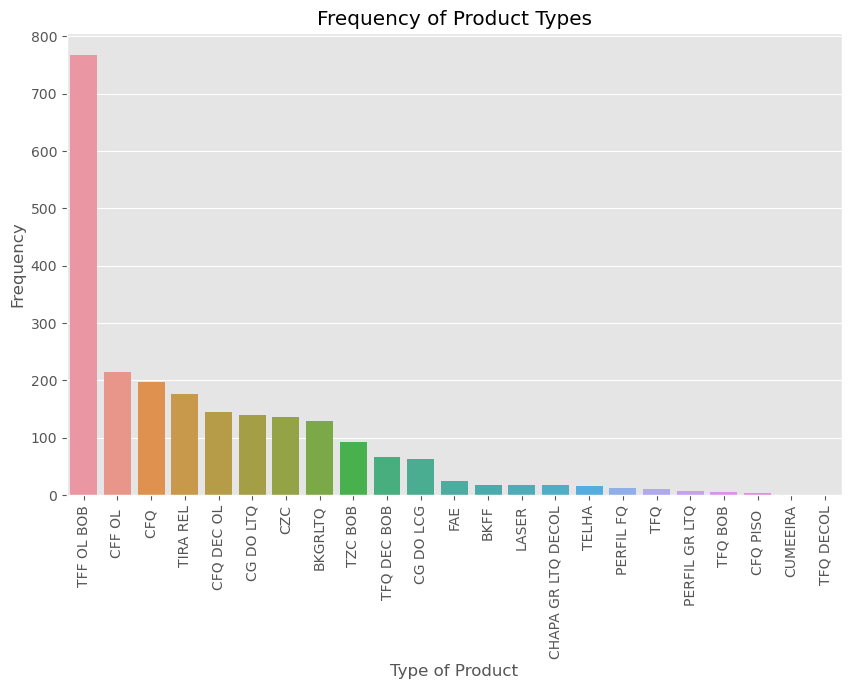

In [55]:
product_count = final_df[['Type of Product']].value_counts().to_frame()
product_count = product_count.rename(columns={0: 'Frequency'})
product_count.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_count.index.get_level_values(0), y='Frequency', data=product_count)
plt.xlabel('Type of Product')
plt.ylabel('Frequency')
plt.title('Frequency of Product Types')
plt.xticks(rotation=90)
plt.show()

Get the min and max price per product over time.

In [82]:
min_max_data = product_group['Price_KG_USD'].agg([min, max])
# Reset the index to make the columns as regular columns
min_max_data = min_max_data.reset_index()
min_max_data

Product Family       min       max
0          BLANK  0.442361  0.800678
1          CHAPA  0.355365  1.046924
2  CORTE TÉRMICO  0.450934  0.711141
3           FITA  0.457816  1.148724
4         PERFIL  0.450598  1.034411
5     RELAMINADO  0.636509  1.332720
6          TELHA  0.579133  1.447896
7   TIRA CORTADA  0.466137  0.636145

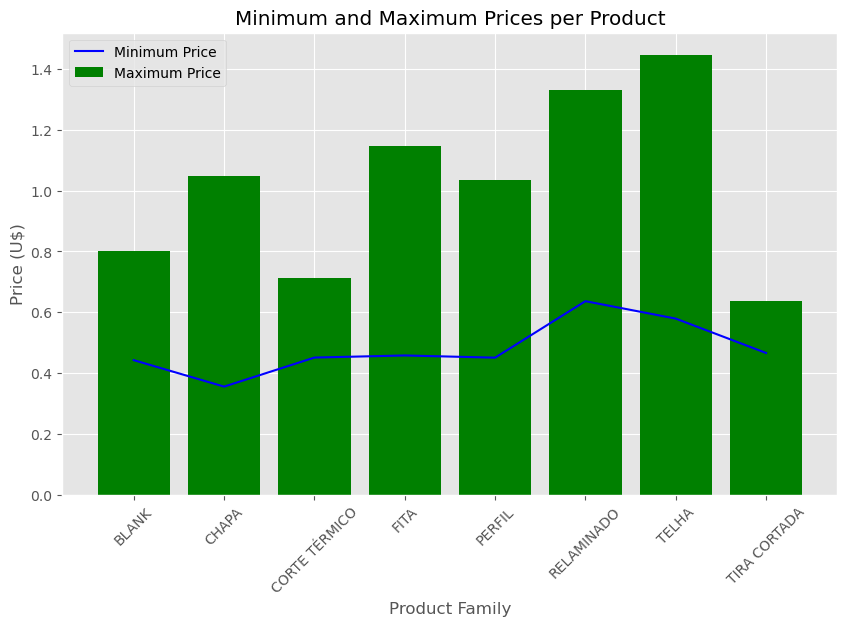

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(min_max_data['Product Family'], min_max_data['min'], label='Minimum Price', color='blue' )
plt.bar(min_max_data['Product Family'], min_max_data['max'], label='Maximum Price', color='green')
plt.xlabel('Product Family')
plt.ylabel('Price (U$)')
plt.title('Minimum and Maximum Prices per Product')
plt.xticks(rotation=45)
plt.legend()
plt.show()

What is the amount sold per **Product Family**?

In [81]:
prod_fam_by_quant = final_df.groupby('Product Family')[values].sum().reset_index()
prod_fam_by_quant

Product Family  Quantity_KG       Total_U$
0          BLANK    42597.947   25545.025620
1          CHAPA   112175.462   67722.766972
2  CORTE TÉRMICO     4421.678    2485.856544
3           FITA   328355.381  223610.386450
4         PERFIL     2156.950    1051.339809
5     RELAMINADO    44462.363   43104.281181
6          TELHA     4486.175    4620.269468
7   TIRA CORTADA     3513.399    1902.255917

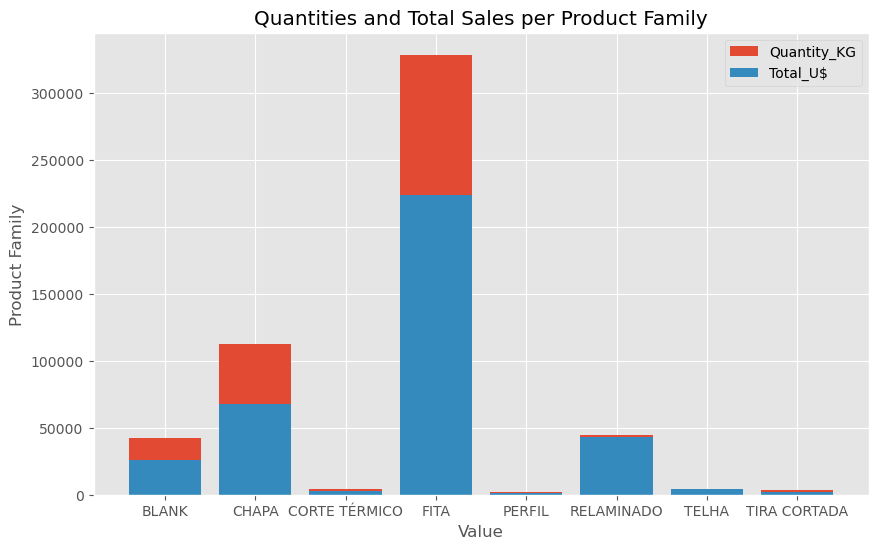

In [182]:
plt.figure(figsize=(10, 6))
plt.bar(prod_fam_by_quant['Product Family'], prod_fam_by_quant['Quantity_KG'], label='Quantity_KG')
plt.bar(prod_fam_by_quant['Product Family'], prod_fam_by_quant['Total_U$'], label='Total_U$')
plt.xlabel('Value')
plt.ylabel('Product Family')
plt.title('Quantities and Total Sales per Product Family')
plt.legend()
plt.show()

How is the sales volume distributed by thickness?

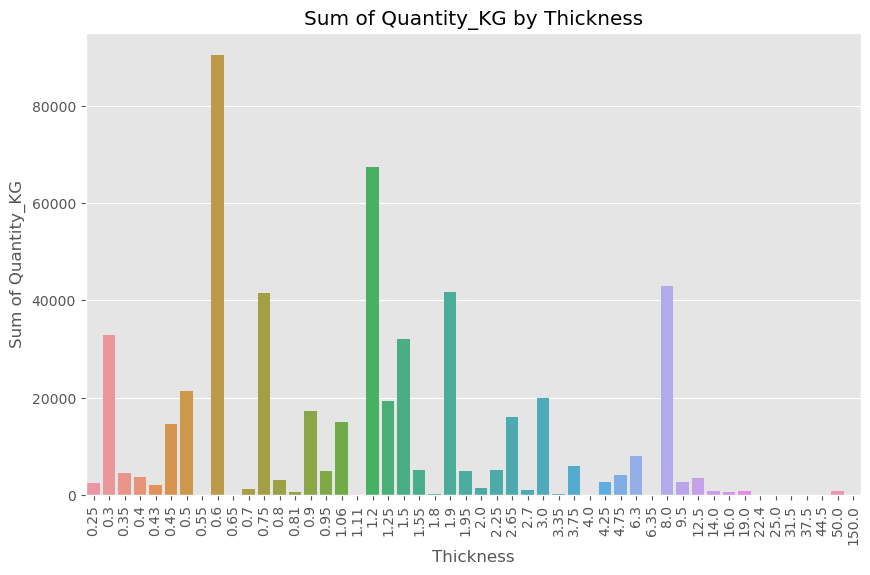

In [162]:
quant_by_thick = final_df.groupby('Thickness')[['Quantity_KG']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Thickness', y='Quantity_KG', data=quant_by_thick)
plt.xlabel('Thickness')
plt.ylabel('Sum of Quantity_KG')
plt.title('Sum of Quantity_KG by Thickness')
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.show()

# 7 Conclusion

By visualizing the data, we can gain a deeper understanding of its distribution across different variables. We can examine how sales are concentrated in specific types of products and thicknesses, as well as observe the price variation over time. While we cannot definitively establish a direct correlation between the exchange rate of the US dollar to Brazilian real and the price of raw materials, there appears to be some level of association between the two. However, to gain a more comprehensive understanding, it would be beneficial to incorporate additional economic variables that may serve as indicators of price fluctuations.

Further analysis could involve exploring factors such as inflation rates, market demand, and global economic trends to identify potential drivers of price changes. By considering a broader range of economic indicators, we can develop a more holistic perspective on the dynamics between the exchange rate and material prices. This in-depth study would provide valuable insights for decision-making and strategic planning in the context of the materials industry.


# 8 References

K. Galli. (2023, June 23). Solving real world data science tasks with Python Pandas [Online]. Available: https://www.youtube.com/watch?v=eMOA1pPVUc4&list=PLFCB5Dp81iNWRZu_TqtS5NPYvyfcyrD3F

R. Mulla. (2023, July 2). Exploratory Data Analysis with Pandas Python 2023 [Online]. Available: https://www.youtube.com/watch?v=xi0vhXFPegw

Webscraping lecture and lab, Dr Sean McGrath

Wes McKinney, Python for Data Analysis, 2nd Edition, O'Reilly Media, Inc,
ISBN: 9781491957660.

P. Deitel,H. Deitel, Intro to Python® for Computer Science and Data Science, O'Reilly Media, Inc,
ISBN-13: 978-0-13-540467-6.